Accuracy: 40.00%


C:\Users\CS LAB 3\AppData\Local\Temp\ipykernel_8820\77466550.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='viridis', marker='x', s=100, edgecolor='k', label="Test")


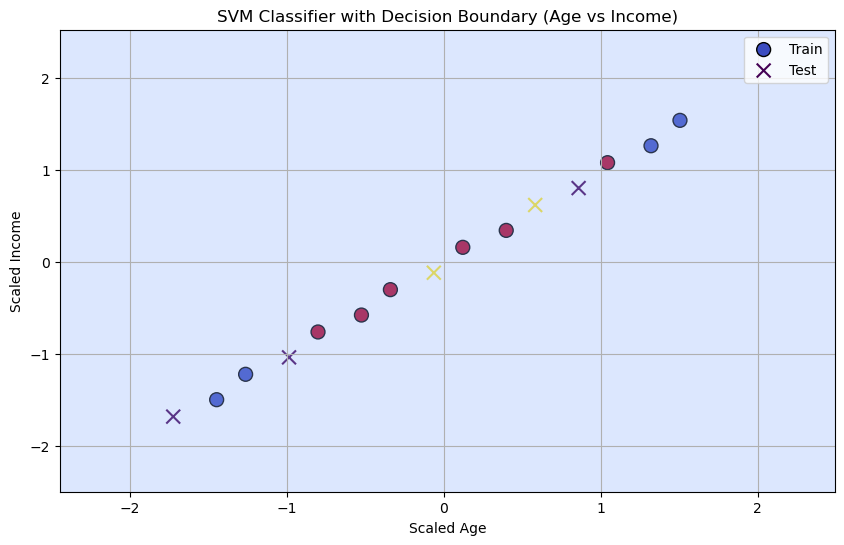

In [15]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 28, 33, 38, 43, 48, 53, 58],
    'Income': [30_000, 35_000, 40_000, 45_000, 50_000, 55_000, 60_000, 65_000, 32_000, 37_000, 42_000, 47_000, 52_000, 57_000, 62_000],
    'Purchase': [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0]
}

df = pd.DataFrame(data)

X = df[['Age', 'Income']].values
y = df['Purchase'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(kernel='linear', random_state=42)

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 6))

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', marker='o', s=100, edgecolor='k', label="Train")

plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='viridis', marker='x', s=100, edgecolor='k', label="Test")

h = .02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.title("SVM Classifier with Decision Boundary (Age vs Income)")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.legend(loc="best")
plt.grid(True)
plt.show()
